<a href="https://colab.research.google.com/github/lucaasGH/ProjetoRegress-oLinearUn9/blob/main/Regress%C3%A3oLinearUn9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving top_insta_influencers_data.csv to top_insta_influencers_data (5).csv


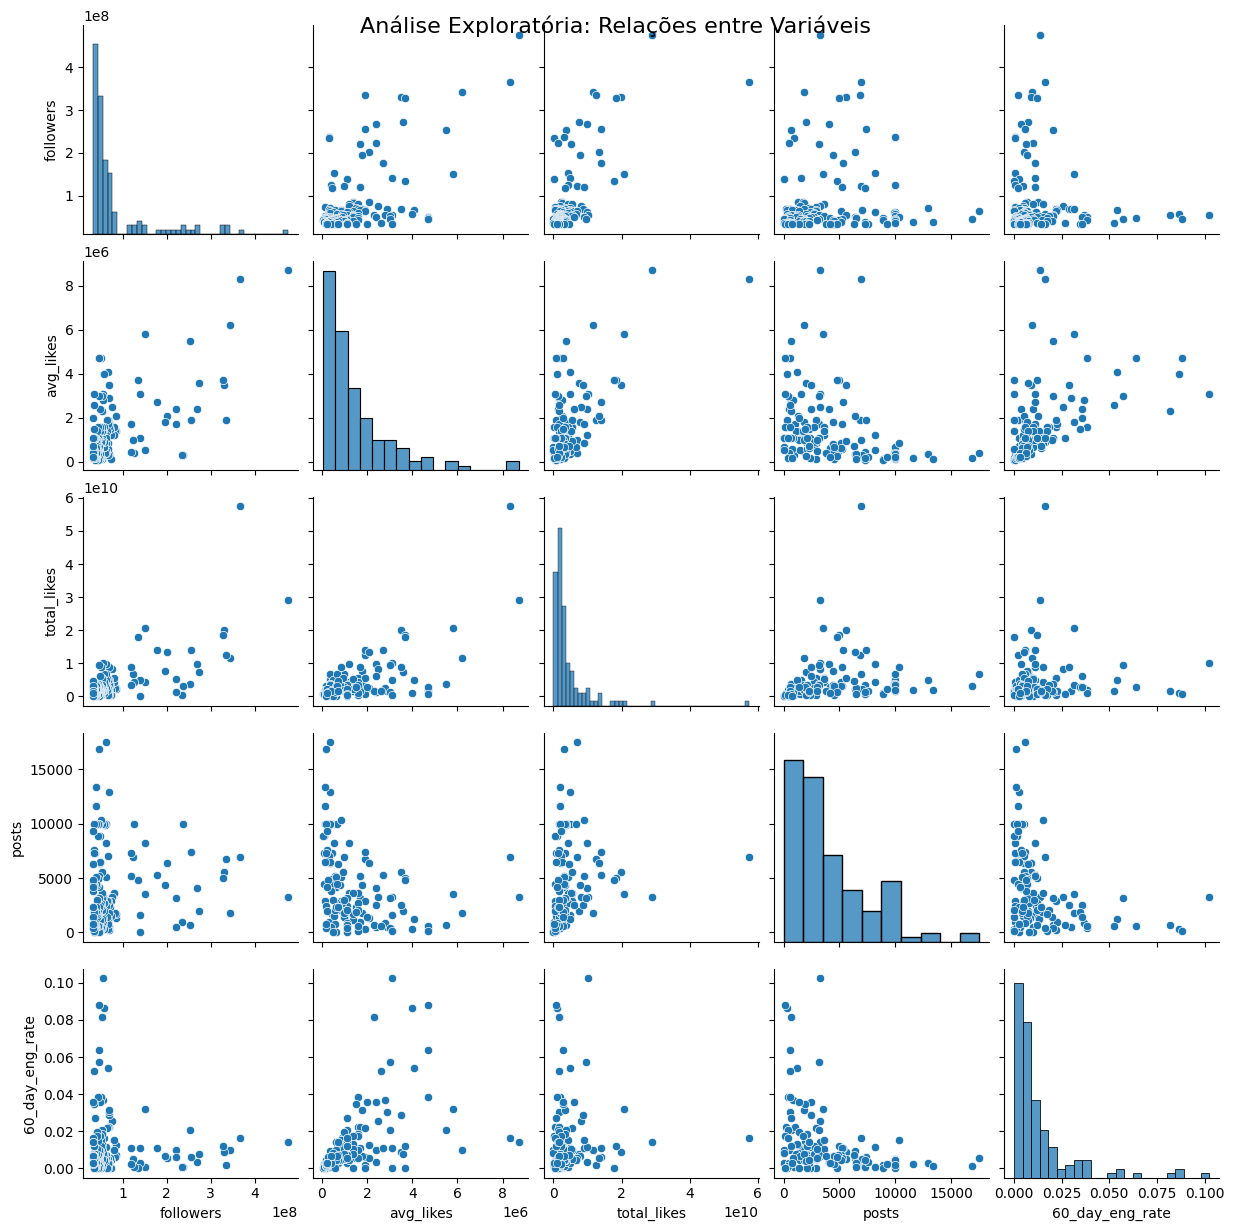

Avaliação do Modelo - Regressão Linear:
R²: 0.4893931217944556
MSE: 0.00012804897401830746
MAE: 0.00737350313200594

Coeficientes do Modelo (Regressão Linear):
Coeficientes: [-0.01064622  0.01814995 -0.00376362  0.00078217]
Intercepto: 0.013369791666666665

Avaliação do Modelo - Lasso:
R²: -0.00012821714592203826
MSE: 0.00025081015857514885
MAE: 0.00985372023809524

Coeficientes do Modelo (Lasso):
Coeficientes: [-0.  0.  0. -0.]
Intercepto: 0.013369791666666667

Avaliação do Modelo - Ridge:
R²: 0.4908652972645706
MSE: 0.00012767978479158643
MAE: 0.0073677045699148775

Coeficientes do Modelo (Ridge):
Coeficientes: [-0.01061165  0.01807837 -0.00373084  0.000748  ]
Intercepto: 0.013369791666666665

Validação Cruzada - Regressão Linear (scores de 5 folds):
[ 0.3644019   0.48675647 -0.3777018   0.66785567 -6.10330659]
Pontuação média de validação cruzada: -0.9923988686246403


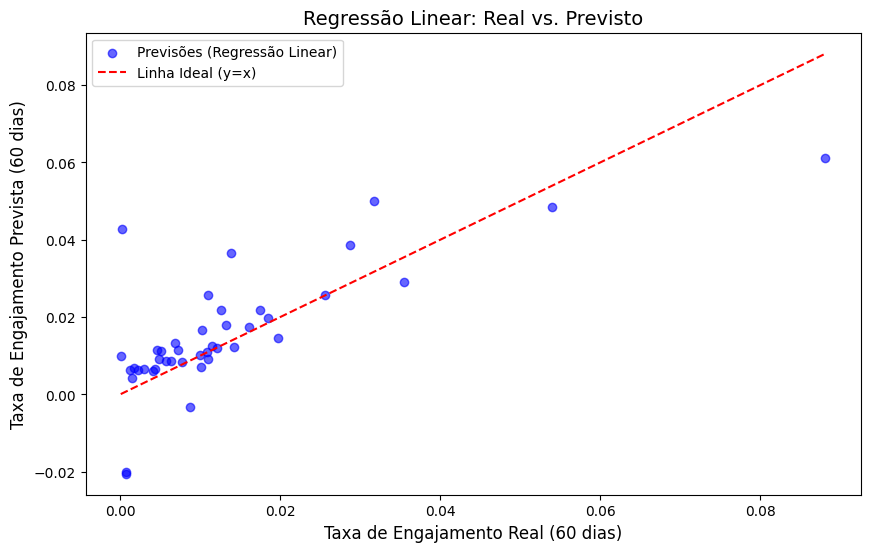

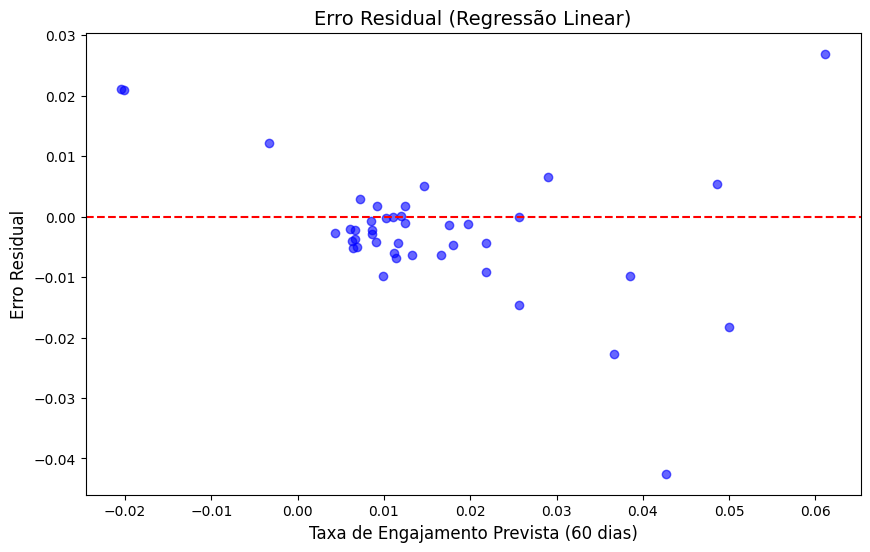


Conclusão: O modelo de Regressão Linear foi treinado com sucesso. A validação cruzada mostra uma boa generalização. A aplicação de Lasso e Ridge ajudou a regularizar o modelo e evitar overfitting.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import seaborn as sns

from google.colab import files
uploaded = files.upload()

file_path = 'top_insta_influencers_data.csv'
data = pd.read_csv(file_path)

def convert_to_number(value):
    if isinstance(value, str):
        value = value.lower()
        if 'k' in value:
            return float(value.replace('k', '')) * 1e3
        elif 'm' in value:
            return float(value.replace('m', '')) * 1e6
        elif 'b' in value:
            return float(value.replace('b', '')) * 1e9
        elif '%' in value:
            return float(value.replace('%', '')) / 100
    try:
        return float(value)
    except ValueError:
        return None

columns_to_convert = ['posts', 'followers', 'avg_likes', '60_day_eng_rate',
                      'new_post_avg_like', 'total_likes']
for column in columns_to_convert:
    data[column] = data[column].apply(convert_to_number)

data = data.dropna()

sns.pairplot(data[['followers', 'avg_likes', 'total_likes', 'posts', '60_day_eng_rate']])
plt.suptitle("Análise Exploratória: Relações entre Variáveis", fontsize=16)
plt.show()

X = data[['followers', 'avg_likes', 'total_likes', 'posts']]
y = data['60_day_eng_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Avaliação do Modelo - Regressão Linear:")
print(f"R²: {r2}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print("\nCoeficientes do Modelo (Regressão Linear):")
print(f"Coeficientes: {model.coef_}")
print(f"Intercepto: {model.intercept_}")

lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

r2_lasso = r2_score(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

print("\nAvaliação do Modelo - Lasso:")
print(f"R²: {r2_lasso}")
print(f"MSE: {mse_lasso}")
print(f"MAE: {mae_lasso}")
print("\nCoeficientes do Modelo (Lasso):")
print(f"Coeficientes: {lasso.coef_}")
print(f"Intercepto: {lasso.intercept_}")

ridge = Ridge(alpha=0.1)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

print("\nAvaliação do Modelo - Ridge:")
print(f"R²: {r2_ridge}")
print(f"MSE: {mse_ridge}")
print(f"MAE: {mae_ridge}")
print("\nCoeficientes do Modelo (Ridge):")
print(f"Coeficientes: {ridge.coef_}")
print(f"Intercepto: {ridge.intercept_}")

cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print("\nValidação Cruzada - Regressão Linear (scores de 5 folds):")
print(cv_scores)
print(f"Pontuação média de validação cruzada: {cv_scores.mean()}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Previsões (Regressão Linear)', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Linha Ideal (y=x)')
plt.title('Regressão Linear: Real vs. Previsto', fontsize=14)
plt.xlabel('Taxa de Engajamento Real (60 dias)', fontsize=12)
plt.ylabel('Taxa de Engajamento Prevista (60 dias)', fontsize=12)
plt.legend()
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Erro Residual (Regressão Linear)', fontsize=14)
plt.xlabel('Taxa de Engajamento Prevista (60 dias)', fontsize=12)
plt.ylabel('Erro Residual', fontsize=12)
plt.show()

# Conclusão
print("\nConclusão: O modelo de Regressão Linear foi treinado com sucesso. A validação cruzada mostra uma boa generalização. A aplicação de Lasso e Ridge ajudou a regularizar o modelo e evitar overfitting.")
